# Euclidean Distance 


**Instructions:**

- You will be using Python 3.
- Avoid using for-loops and while-loops, unless you are explicitly told to do so.
- Do not modify the (# GRADED FUNCTION [function name]) comment in some cells. Your work would not be graded if you change this. Each cell containing that comment should only contain one function.
- After coding your function, run the cell right below it to check if your result is correct.
- The token generated by Coursera (COURSERA_TOKEN) expires every <b>30 minutes</b>. It is advisable to always work with the most recent generated token so as to avoid any submission related errors. If you receive such error messages, rerun the cells containing your code and the GRADED FUNCTION in the same order. 
- - The blue button "Submit Assignment" does not work. After running all the cells, please go directly to Assignment-> My submission to see your results.

Let's get started!


## About iPython Notebooks ##

iPython Notebooks are interactive coding environments embedded in a webpage. You will be using iPython notebooks in this class. You only need to write code between the ### START CODE HERE ### and ### END CODE HERE ### comments. After writing your code, you can run the cell by either pressing "SHIFT"+"ENTER" or by clicking on "Run Cell" (denoted by a play symbol) in the upper bar of the notebook. 

We will often specify "(≈ X lines of code)" in the comments to tell you about how much code you need to write. It is just a rough estimate, so don't feel bad if your code is longer or shorter.

## Dataset
Suppose we have a $n$ dimensional space $\mathbb{R}^{n}$, we want to generate $1000000$ pairs of uniformly distributed random
numbers $X\sim\mathscr{U}\left(-1,\:1\right)$. 

For instance, if $n=1$, we generate $p_{1}=\left(x_{1},\:y_{1}\right)$, $p_{2}=\left(x_{2},\:y_{2}\right)$, $\cdots$, $p_{1000000}=\left(x_{1000000},\:y_{1000000}\right)$, where $x_{1}$, $x_{2}$, $\cdots$, $x_{1000000}$ are uniformly distributed, $y_{1}$, $y_{2}$, $\cdots$, $y_{1000000}$ are uniformly distributed too. 

If $n=2$, we generate $\mathbf{p}_{1}=\left(\mathbf{x}_{1},\:\mathbf{y}_{1}\right)$, where $\mathbf{x}_{1}=\left(x_{1}^{\left(1\right)},\:x_{1}^{\left(2\right)}\right)$ and $\mathbf{y}_{1}=\left(y_{1}^{\left(1\right)},\:y_{1}^{\left(2\right)}\right)$, $\mathbf{p}_{2}=\left(\mathbf{x}_{2},\:\mathbf{y}_{2}\right)$, where $\mathbf{x}_{2}=\left(x_{2}^{\left(1\right)},\:x_{2}^{\left(2\right)}\right)$ and $\mathbf{y}_{2}=\left(y_{2}^{\left(1\right)},\:y_{2}^{\left(2\right)}\right)$, $\cdots$, $\mathbf{p}_{1000000}=\left(\mathbf{x}_{1000000},\:\mathbf{y}_{1000000}\right)$, where $\mathbf{x}_{1000000}=\left(x_{1000000}^{\left(1\right)},\:x_{1000000}^{\left(2\right)}\right)$ and $\mathbf{y}_{1000000}=\left(y_{1000000}^{\left(1\right)},\:y_{1000000}^{\left(2\right)}\right)$, and $x_{1}^{\left(1\right)}$, $x_{2}^{\left(1\right)}$, $\cdots$, $x_{1000000}^{\left(1\right)}$ are uniformly distributed, $x_{1}^{\left(2\right)}$, $x_{2}^{\left(2\right)}$, $\cdots$, $x_{1000000}^{\left(2\right)}$ are uniformly distributed, $y_{1}^{\left(1\right)}$, $y_{2}^{\left(1\right)}$, $\cdots$, $y_{1000000}^{\left(1\right)}$ are uniformly distributed, and $y_{1}^{\left(2\right)}$, $y_{2}^{\left(2\right)}$, $\cdots$, $y_{1000000}^{\left(2\right)}$ are uniformly distributed too. 

In [1]:
# imports 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics.pairwise import euclidean_distances

import sys
sys.path.append("..")
import grading

import timeit
import matplotlib.mlab
import scipy.stats
from scipy.stats import norm

In [2]:
TIMEOUT_UPPER = 1800

In [3]:
### ONLY FOR GRADING. DO NOT EDIT ###
submissions=dict()
assignment_key="2RRok_GPEeeQZgq5AVms2g" 
all_parts=["pmqxU", "VrXL6", "XsLp1","jD7SY","Ad4J0","1nPFm"]
### ONLY FOR GRADING. DO NOT EDIT ###

In [4]:
COURSERA_TOKEN = "NFTw8wtOzM3fsprC"# the key provided to the Student under his/her email on submission page
COURSERA_EMAIL = "ayushs1729@gmail.com"# the email

In [5]:
def euclidean_distances_stats(euclidean_distances_vector):
    """
    Calculate Euclidean distances statistics
    
    Arguments:
    euclidean_distances_vector - 1-D vector of Euclidean distances
    
    Return:
        np.array() of length 4
        the first element of array is the mean
        the second element is variance
        the third element is skew of the distribution
        the forth element is kurtusis of the distribution
    """
    if len(euclidean_distances_vector) > 0:
        this_mean = np.mean( euclidean_distances_vector )
        this_variance = np.var( euclidean_distances_vector )
        this_skewness = scipy.stats.skew( euclidean_distances_vector )    
        this_kurtosis = scipy.stats.kurtosis( euclidean_distances_vector )
        result = np.array([this_mean, this_variance, this_skewness, this_kurtosis])
    else:
        result = np.array([0.] * 4)
    return result


def print_stats(euclidean_stats):
    """
    Print Euclidean distances statistics
    
    Arguments: 
    euclidean_stats - np.array() of length 4
        the first element of array is the mean
        the second element is variance
        the third element is skew of the distribution
        the forth element is kurtusis of the distribution
    """
    this_mean = euclidean_stats[0]
    this_variance = euclidean_stats[1]
    this_skewness = euclidean_stats[2]
    this_kurtosis = euclidean_stats[3]
    print( 'Expectation of Euclidean distances: ', this_mean, '\n' )
    print( 'Variance of Euclidean distances: ', this_variance, '\n' )
    print( 'Skewness of Euclidean distances: ', this_skewness, '\n' )
    print( 'Kurtosis of Euclidean distances: ',this_kurtosis, '\n' )


def plot_distribution(euclidean_distances_vector, euclidean_stats, dim_space, bins_number=30):
    """
    Plot histogram of Euclidean distances against normal distribution PDF
    
    Arguments: 
    
    euclidean_distances_vector - 1-D vector of Euclidean distances
    
    euclidean_stats - np.array() of length 4
        the first element of array is the mean
        the second element is variance
        the third element is skew of the distribution
        the forth element is kurtusis of the distribution
    
    dim_space - dimension of the space
    bins_number - number of bins in the histogram
    """
    # verbose, but this is for clarity
    this_mean = euclidean_stats[0]
    this_variance = euclidean_stats[1]
    this_skewness = euclidean_stats[2]
    this_kurtosis = euclidean_stats[3]
    
    sample_size = len(euclidean_distances_vector)
    try:
        fig_l, ax_l = plt.subplots()
        n_bins_l, bins_l, patches_l = ax_l.hist( euclidean_distances_vector, bins_number, normed=1 )  
        y_l = matplotlib.mlab.normpdf( bins_l, this_mean, np.sqrt( this_variance ) )
        ax_l.plot( bins_l, y_l, 'r--' )
        plt.title( 'Histogram for dimension = %d and sample size = %d \n $\mu$ = %.3f, $\sigma^2$ = %.3f, Skewness = %.3f, Kurtosis = %.3f' \
                                           % (dim_space, sample_size, this_mean, this_variance, this_skewness, this_kurtosis ) )
        fig_l.tight_layout()
        plt.grid( True, which='both')
        plt.minorticks_on()
        return fig_l
    except:
        return None

In [6]:
lower_boundary = 0
upper_boundary = 1
n = 5 # dimension
sample_size = 10000

np.random.seed(9001) # set the seed to yield reproducible results

X = np.random.uniform( low=lower_boundary, high=upper_boundary, size=(sample_size, n) )
Y = np.random.uniform( low=lower_boundary, high=upper_boundary, size=(sample_size, n) )

print( 'X: ', X )
print( 'Y: ', Y )

X:  [[ 0.09220363  0.85065196  0.90075012  0.59361319  0.84875299]
 [ 0.13300259  0.50209599  0.76796562  0.92047036  0.47544869]
 [ 0.72927521  0.8054414   0.4002669   0.01355402  0.31719426]
 ..., 
 [ 0.82071112  0.46084335  0.92036074  0.31746465  0.03535725]
 [ 0.21581585  0.12317179  0.42738517  0.35466096  0.93360429]
 [ 0.84577044  0.67545711  0.22706133  0.58893715  0.98216918]]
Y:  [[ 0.32900813  0.34963352  0.52804383  0.38208285  0.03237214]
 [ 0.11760546  0.46402303  0.12260294  0.18876132  0.99071561]
 [ 0.49587495  0.18125864  0.61421199  0.29089588  0.71308158]
 ..., 
 [ 0.14440936  0.38925149  0.50634999  0.29421895  0.96282509]
 [ 0.15239208  0.4741476   0.84900715  0.70515312  0.22175127]
 [ 0.46490389  0.50546926  0.04574762  0.75900819  0.25636212]]


## Part 1
Calculate the Euclidean distance between the two points of each pair. Do this in a loop. Hint: use sklearn to do the computation.

Plot the histogram of the Euclidean distance. In a $n$ dimensional space $\mathbb{R}^{n}$, the Euclidean distance between $\mathbf{x}=\left(x_{1},\:x_{2},\:\cdots,\:x_{n}\right)$ and $\mathbf{y}=\left(y_{1},\:y_{2},\:\cdots,\:y_{n}\right)$ is given
by 
\begin{equation}
\begin{aligned}d_{E}\left(\mathbf{p},\:\mathbf{q}\right) & =\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}+\cdots+\left(x_{n}-y_{n}\right)^{2}}\\
 & =\sqrt{\sum_{i=1}^{n}\left(x_{i}-y_{i}\right)^{2}}\\
 & =\left\Vert \mathbf{x}-\mathbf{y}\right\Vert _{2}
\end{aligned}
\end{equation}

In [7]:
start = timeit.default_timer()
### START CODE HERE ### (≈ 4 lines of code)
# implement a loop which computes Euclidean distances between each element in X and Y
# store results in euclidean_distances_vector_l list
# euclidean_distances_vector_l = np.array(
#     [np.sqrt(sum(xy_i**2 for xy_i in xy)) for xy in (X-Y)]
# )
euclidean_distances_vector_l = np.diagonal( euclidean_distances(X, Y) )
### END CODE HERE ###
stop = timeit.default_timer()
print( 'Running time: ', stop-start )

Running time:  2.73806359898299


In [8]:
# Filename: SklearnDistance, PART: pmqxU
### GRADED PART (DO NOT EDIT) ###
result = euclidean_distances_stats(euclidean_distances_vector_l)
part_1 = list(result.squeeze())
try:
    part1 = " ".join(map(repr, part_1))
except TypeError:
    part1 = repr(part_1)
submissions[all_parts[0]]=part1
grading.submit(COURSERA_EMAIL, COURSERA_TOKEN, assignment_key,all_parts[:1],all_parts,submissions)
result
### GRADED PART (DO NOT EDIT) ###

Submission successful, please check on the coursera grader page for the status


array([ 0.87662633,  0.06098537, -0.03504537, -0.26237711])

Expectation of Euclidean distances:  0.876626326649 

Variance of Euclidean distances:  0.0609853651691 

Skewness of Euclidean distances:  -0.0350453681886 

Kurtosis of Euclidean distances:  -0.262377106269 



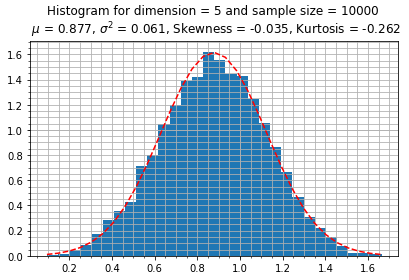

In [9]:
print_stats(result)
plot_distribution(euclidean_distances_vector_l, result, n)
try:
    plt.show()
except: pass

## Part 2
Calculate the Euclidean distance between the two points of each pair using vectorized operations and inner product.

In [10]:
# using vectorization by calculating inner product
start = timeit.default_timer()
# variables needed for grading
euclidean_distances_vector_l_vectorized = []
### START CODE HERE ### (≈ 3 lines of code)
# compute Euclidean distances between each element in X and Y using (vectorized implementation)
# store results in euclidean_distances_vector_v 
# euclidean_distances_vector_v = np.apply_along_axis(lambda xy: np.sqrt(np.dot(xy, xy)), axis=1, arr=(X-Y))
euclidean_distances_vector_v = np.sqrt( np.sum( (X-Y)*(X-Y), axis=1 ) )
euclidean_distances_vector_l_vectorized = euclidean_distances_vector_v
### END CODE HERE ###
stop = timeit.default_timer()
print( 'Running time: ', stop-start )

Running time:  0.0009554619900882244


In [11]:
# Filename: VectorizedDistance, PART: VrXL6
### GRADED PART (DO NOT EDIT) ### 
result = euclidean_distances_stats(euclidean_distances_vector_l_vectorized)
part_2 = result.squeeze()
try:
    part2 = " ".join(map(repr, part_2))
except TypeError:
    part2 = repr(part_2)
submissions[all_parts[1]]=part2
grading.submit(COURSERA_EMAIL, COURSERA_TOKEN, assignment_key,all_parts[:2],all_parts,submissions)
result
### GRADED PART (DO NOT EDIT) ###

Submission successful, please check on the coursera grader page for the status


array([ 0.87662633,  0.06098537, -0.03504537, -0.26237711])

Expectation of Euclidean distances:  0.876626326649 

Variance of Euclidean distances:  0.0609853651691 

Skewness of Euclidean distances:  -0.0350453681886 

Kurtosis of Euclidean distances:  -0.262377106269 



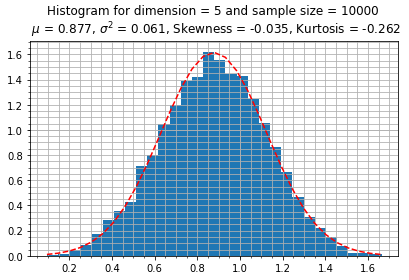

In [12]:
print_stats(result)
fig = plot_distribution(euclidean_distances_vector_l_vectorized, result, n)
try:
    plt.plot()
except: pass

## Question 3 
We repeat question 1 and question 2 for $n=1$, $n=5$, $n=10$, $n=100$, $n=1000$, $n=5000$, and $n=10000$. Then plot the expectation and variance as a function of $n$.
You need to generate two sets of n-dimensional samples, compute 

In [13]:
def VectorizationMethod(dim_space, sample_size, lower_boundary, upper_boundary, bins_number=30):
    """
    Generate sample_size elements from dim_space-dimensional space. The coordinates of each element in the space
    are sampled from uniform distribution between lower_boundary and upper_boundary
    
    Arguments: 
    
    dim_space - dimension of the space, a positive integer
    sample_size - number of samples in the dim_space-dimensional space
    lower_boundary - lower boundary of coordinates sampled from U(lower_boundary, upper_boundary)
    upper_boundary - lower boundary of coordinates sampled from U(lower_boundary, upper_boundary)
    bins_number - number of bins to plot a histogram
    
    stats_result - np.array() of length 4
        the first element of array is the mean
        the second element is variance
        the third element is skew of the distribution
        the forth element is kurtusis of the distribution
    """
    np.random.seed(42)
    # variables needed for grading
    euclidean_distances_vector_v = []
    ### START CODE HERE ### (≈ 7-10 lines of code)
    # store results in euclidean_distances_vector_v
    X = np.random.uniform( low=lower_boundary, high=upper_boundary, size=(sample_size, dim_space) )
    Y = np.random.uniform( low=lower_boundary, high=upper_boundary, size=(sample_size, dim_space) )
    # euclidean_distances_vector_v = np.apply_along_axis(lambda xy: np.sqrt(np.dot(xy, xy)), axis=1, arr=(X-Y))
    euclidean_distances_vector_v = np.sqrt( np.sum( (X-Y)*(X-Y), axis=1 ) )
    ### END CODE HERE ###
    stats_result = euclidean_distances_stats(euclidean_distances_vector_v)
    return tuple(stats_result.tolist())

In [14]:
start = timeit.default_timer()

sample_size = 10000
lower_boundary = 0
upper_boundary = 1
dimension_vector = [2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000] 
n_dims = len(dimension_vector)

euclidean_distances_mean_vector = [np.nan] * n_dims
euclidean_distances_variance_vector = [np.nan] * n_dims
euclidean_distances_skewness_vector = [np.nan] * n_dims
euclidean_distances_kurtosis_vector = [np.nan] * n_dims

for idx, space_dims in enumerate(dimension_vector):
    
    # using vectorization
    euclidean_distances_mean, euclidean_distances_variance, euclidean_distances_skewness, euclidean_distances_kurtosis = \
                 VectorizationMethod( space_dims, sample_size, lower_boundary, upper_boundary )
    euclidean_distances_mean_vector[idx] = euclidean_distances_mean
    euclidean_distances_variance_vector[idx] = euclidean_distances_variance
    euclidean_distances_skewness_vector[idx] = euclidean_distances_skewness
    euclidean_distances_kurtosis_vector[idx] = euclidean_distances_kurtosis
    
    print( 'Calculating finished for sample size = %d, dimension = %d\n' %( sample_size, space_dims) )

stop = timeit.default_timer()
print( 'Running time: ', stop-start )

Calculating finished for sample size = 10000, dimension = 2

Calculating finished for sample size = 10000, dimension = 5

Calculating finished for sample size = 10000, dimension = 10

Calculating finished for sample size = 10000, dimension = 20

Calculating finished for sample size = 10000, dimension = 40

Calculating finished for sample size = 10000, dimension = 60

Calculating finished for sample size = 10000, dimension = 80

Calculating finished for sample size = 10000, dimension = 100

Calculating finished for sample size = 10000, dimension = 200

Calculating finished for sample size = 10000, dimension = 400

Calculating finished for sample size = 10000, dimension = 600

Calculating finished for sample size = 10000, dimension = 800

Calculating finished for sample size = 10000, dimension = 1000

Running time:  1.679027599748224


In [15]:
# Filename : DistancesMean, PART: XsLp1
### GRADED PART (DO NOT EDIT) ###
part_3 = list(euclidean_distances_mean_vector)
try:
    part3 = " ".join(map(repr, part_3))
except TypeError:
    part3 = repr(part_3)
submissions[all_parts[2]]=part3
grading.submit(COURSERA_EMAIL, COURSERA_TOKEN, assignment_key,all_parts[:3],all_parts,submissions)
euclidean_distances_mean_vector
### GRADED PART (DO NOT EDIT) ###

Submission successful, please check on the coursera grader page for the status


[0.5244117684024786,
 0.8822841161864812,
 1.2676717606162842,
 1.8110504380007288,
 2.5684460728327534,
 3.1487610877583165,
 3.64396853019095,
 4.073344650824303,
 5.768449828048197,
 8.160150803731382,
 9.997217189326257,
 11.543203181243685,
 12.906928018524363]

In [16]:
# Filename: DistancesVariance, PART jD7SY
### GRADED PART (DO NOT EDIT) ###
part_4 = list(euclidean_distances_variance_vector)
try:
    part4 = " ".join(map(repr, part_4))
except TypeError:
    part4 = repr(part_4)
submissions[all_parts[3]]=part4
grading.submit(COURSERA_EMAIL, COURSERA_TOKEN, assignment_key,all_parts[:4],all_parts,submissions)
euclidean_distances_variance_vector
### GRADED PART (DO NOT EDIT) ###

Submission successful, please check on the coursera grader page for the status


[0.06230677292748971,
 0.061198079555789694,
 0.0608126495018327,
 0.059183678488410246,
 0.05949007814616248,
 0.05725268125796696,
 0.05935452158486421,
 0.05831142832530561,
 0.05928563431624706,
 0.059076129472239725,
 0.05762985490169308,
 0.059174927565307574,
 0.0581599059610326]

In [17]:
# Filename:  DistancesSkewness, PART: Ad4J0
### GRADED PART (DO NOT EDIT) ###
part_5 = list(euclidean_distances_skewness_vector)
try:
    part5 = " ".join(map(repr, part_5))
except TypeError:
    part5 = repr(part_5)
submissions[all_parts[4]]=part5
grading.submit(COURSERA_EMAIL, COURSERA_TOKEN, assignment_key,all_parts[:5],all_parts,submissions)
euclidean_distances_skewness_vector
### GRADED PART (DO NOT EDIT) ###

Submission successful, please check on the coursera grader page for the status


[0.1988768646152347,
 -0.021074633737255224,
 -0.05749817620192312,
 -0.0718962153911559,
 -0.006116609407693513,
 -0.023983251393225696,
 -0.05204557015527253,
 -0.018424595473803283,
 -0.0040378906739251515,
 -0.020853349346522568,
 -0.014025628984910854,
 0.029458241353260126,
 -0.04396638054084743]

In [18]:
# Filename: DistancesKurtosis, PART: 1nPFm
### GRADED PART (DO NOT EDIT) ###
part_6 = list(euclidean_distances_kurtosis_vector)
try:
    part6 = " ".join(map(repr, part_6))
except TypeError:
    part6 = repr(part_6)
submissions[all_parts[5]]=part6
grading.submit(COURSERA_EMAIL, COURSERA_TOKEN, assignment_key,all_parts[:6],all_parts,submissions)
euclidean_distances_kurtosis_vector
### GRADED PART (DO NOT EDIT) ###

Submission successful, please check on the coursera grader page for the status


[-0.6384013133225133,
 -0.2758439734602782,
 -0.15223233078033216,
 -0.07988375526844216,
 -0.01044769148587088,
 -0.08064860279897701,
 -0.02331335574782667,
 -0.020166667252636383,
 0.10669665209383927,
 -0.0536906631006282,
 0.024930971487188813,
 0.003075352050577962,
 0.06775391815498777]

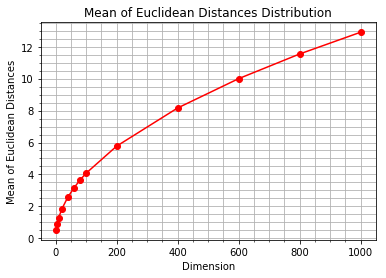

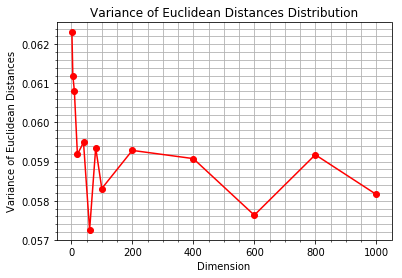

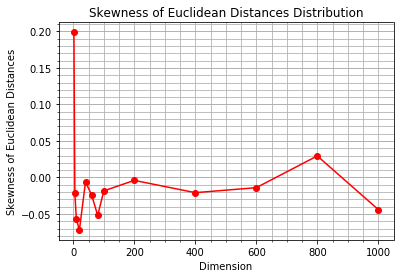

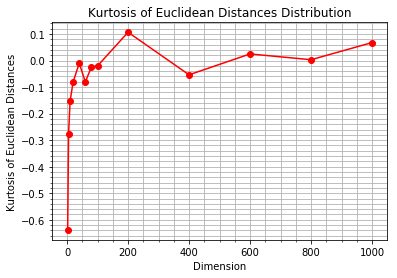

In [19]:
# here we plot the stats for different sample sizes
try:
    plt.figure()
    plt.plot( dimension_vector, euclidean_distances_mean_vector, 'r-', marker='o' )
    plt.grid( True, which='both')
    plt.minorticks_on()
    plt.title( 'Mean of Euclidean Distances Distribution' )
    plt.xlabel( 'Dimension' )
    plt.ylabel( 'Mean of Euclidean Distances' )

    plt.figure()
    plt.plot( dimension_vector, euclidean_distances_variance_vector, 'r-', marker='o' )
    plt.grid( True, which='both')
    plt.minorticks_on()
    plt.title( 'Variance of Euclidean Distances Distribution' )
    plt.xlabel( 'Dimension' )
    plt.ylabel( 'Variance of Euclidean Distances' )

    plt.figure()
    plt.plot( dimension_vector, euclidean_distances_skewness_vector, 'r-', marker='o' )
    plt.grid( True, which='both')
    plt.minorticks_on()
    plt.title( 'Skewness of Euclidean Distances Distribution' )
    plt.xlabel( 'Dimension' )
    plt.ylabel( 'Skewness of Euclidean Distances' )

    plt.figure()
    plt.plot( dimension_vector, euclidean_distances_kurtosis_vector, 'r-', marker='o' )
    plt.grid( True, which='both')
    plt.minorticks_on()
    plt.title( 'Kurtosis of Euclidean Distances Distribution' )
    plt.xlabel( 'Dimension' )
    plt.ylabel( 'Kurtosis of Euclidean Distances' )

    matplotlib.pyplot.show()
except: pass